# Learning Curves and Diagnostics

>    Diagnosing Model Behavior, Data Sufficiency, and Generalization
    
## Objective

This notebook provides practical diagnostic tools to understand:

- Whether a model suffers from bias or variance

- If more data will improve performance

- Whether features or model complexity are the bottleneck

- How stable model performance is across data splits

It answers:

    Is my model underfitting, overfitting, or simply data-limited?

## Why Learning Curves Matter

Aggregate metrics hide:

- Underfitting

- Overfitting

- Data insufficiency

- Feature limitations

Learning curves expose why a model behaves as it does.

## Business Relevance

Learning curves inform decisions such as:

- Collect more data vs engineer features

- Simplify vs complexify models

- Increase regularization

- Stop model investment early

## Imports and Dataset

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    learning_curve,
    StratifiedKFold
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Supervised-classification/synthetic_credit_default_classification.csv")

X = df.drop(columns=["default", "customer_id"])
y = df["default"]

df.head()


,customer_id,age,annual_income,credit_utilization,debt_to_income,loan_amount,loan_term_months,num_past_defaults,employment_years,credit_score,default
0,1,59,23283.682822,0.187813,0.245248,20232.165654,24,0,4.575844,689.627408,1
1,2,49,61262.608063,0.291774,0.396763,26484.067591,36,0,3.317515,697.770541,1
2,3,35,60221.743160,0.230557,0.122859,27142.522594,24,1,11.871955,713.721429,0
3,4,63,93603.112731,0.157906,0.635484,1000.000000,12,0,2.256651,655.306417,1
4,5,28,71674.557271,0.167549,0.422446,15254.246561,48,0,6.971270,644.247643,0


 # MODEL
 
 ## Baseline Pipeline

In [4]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])


### Learning Curve Computation

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X, y,
    cv=cv,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)


### Plot Learning Curves

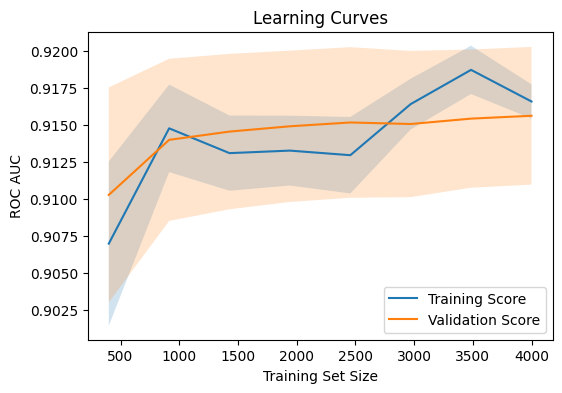

In [6]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, val_mean, label="Validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC")
plt.title("Learning Curves")
plt.legend()
plt.show()


## Diagnostic Patterns
### Case 1: High Bias

- Training and validation scores both low

- Curves converge early

### Case 2: High Variance

- Large gap between curves

- Validation improves with more data

### Case 3: Data-Limited

- Validation keeps improving

- No convergence yet

## Effect of Regularization

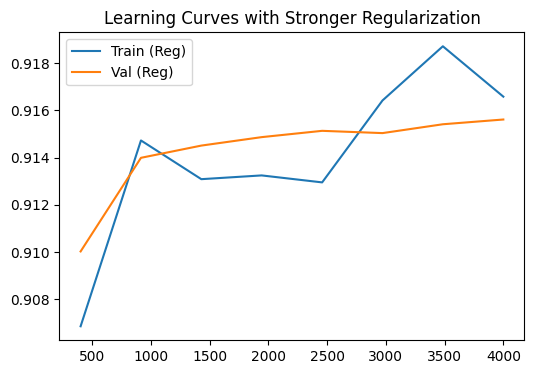

In [7]:
pipeline_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(C=0.1, max_iter=1000))
])

_, train_reg, val_reg = learning_curve(
    pipeline_reg,
    X, y,
    cv=cv,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 8)
)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_reg.mean(axis=1), label="Train (Reg)")
plt.plot(train_sizes, val_reg.mean(axis=1), label="Val (Reg)")
plt.title("Learning Curves with Stronger Regularization")
plt.legend()
plt.show()


- ✔ Reduced variance
- ✔ Slightly higher bias

## Diagnostics Across Models


| Symptom                | Interpretation  | Action            |
| ---------------------- | --------------- | ----------------- |
| Low train + low val    | Underfitting    | Add features      |
| High train + low val   | Overfitting     | Regularize        |
| Val improves with data | Data-limited    | Collect data      |
| Flat curves            | Feature-limited | Engineer features |


## Stability Diagnostics (Variance Across Folds)



In [8]:
val_scores.std(axis=1)


array([0.00725292, 0.0054692 , 0.0052406 , 0.00510469, 0.00507989,
       0.00493198, 0.00466225, 0.00464596])

## What Learning Curves Cannot Tell You

- ❌ Feature leakage
- ❌ Causal validity
- ❌ Deployment drift
- ❌ Business cost alignment

Use alongside:

- Residual analysis

- Cross-validation

- Interpretability checks

## Common Mistakes (Avoided)

- ❌ Evaluating on training data only
- ❌ Using too few folds
- ❌ Ignoring confidence bands
- ❌ Over-interpreting small datasets
- ❌ Mixing preprocessing outside pipeline

## Summary Table

| Diagnostic Tool | Purpose          |
| --------------- | ---------------- |
| Learning curve  | Bias vs variance |
| CV variance     | Stability        |
| Train–val gap   | Overfitting      |
| Convergence     | Data sufficiency |


## Key Takeaways

- Learning curves explain performance behavior

- They guide data vs modeling decisions

- Regularization reshapes curves

- Pipelines prevent leakage

- Diagnostics precede tuning

## Next Notebook

06_Model_Evaluation_and_Validation/

└── [06_validation_under_imbalance_and_drift.ipynb](06_validation_under_imbalance_and_drift.ipynb)

<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)